# Statistická analýza, příprava dat

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

Pro tento příklad budeme používat podmnožinu s tohoto souboru.
!!! Vytvořený subset nemusí statisticky odpovídat původnímu souboru

## Sub dataset
- Data  = struktura s vyplněnými daty
- m 	= počet řádků = 100
- x’s = vstupní proměnná / features
- y’s = výstupní promměná / target
- (x, y) = jeden řádek z training dataset
- x(2) = (4, 5, 3374, 85)
- y(2) = 1 050 000

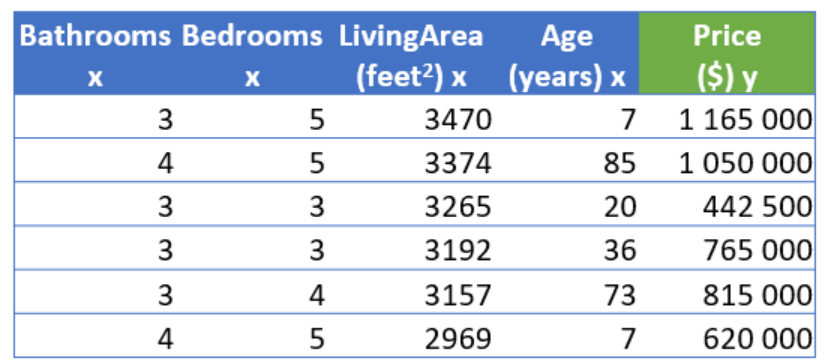

# Úkol
- Vytvořte regresní lineání model z parametrů, které jste vybrali minulé cvičení
- Data před zpracováním standardizujte
- Model vytvořte ručně
- Model vytvořte pomocí scikit-learn

# Načtení dat

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv ("../dataset/portland_filtered.csv",  sep=';')
data=data.dropna()

# Lineání model bez pomocí knihoven
- Vytvořte si ručně model lineární regrese bez pomoci externích knihoven
- Vypište jeho parametry
- Vypiše jeho skóre pro trénovací a validační data
- Vykreslete graf historie učení
- Vizualizujte model

w0 (intercept):  528288.8242639155
w1 (koef):  120362.00353288729
Trenovaci data:  14304258069.598505
Testovaci data:  7397305137.904859
R trenovaci data:  0.37240335994605034
R testovaci data:  -0.1200118502676133


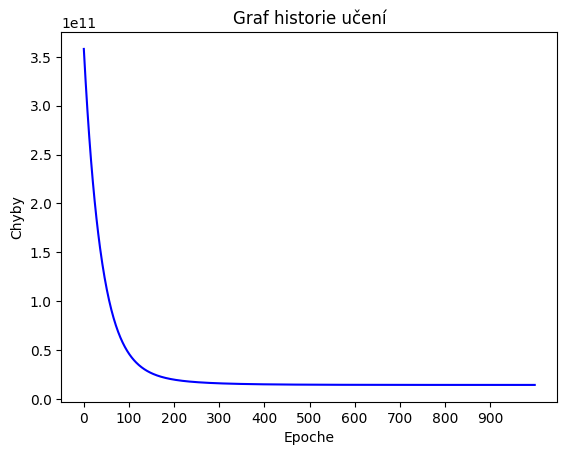

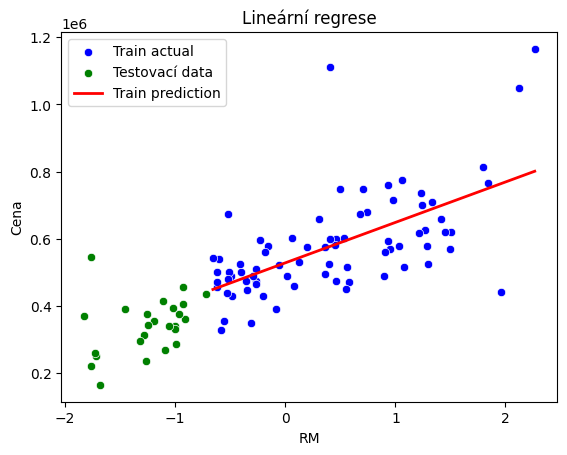

In [95]:
X = np.array(data['livingArea']).reshape(-1, 1)
Y = np.array(data['price']).reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

train_size = int(0.75 * len(X))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

learning_rate = 0.01
epochs = 1000
m = len(X_train)

w0 = 0
w1 = 0
history = []

for _ in range(epochs):
    Y_pred = w0 + w1 * X_train
    error = Y_pred - Y_train
    cost = np.mean(error ** 2)
    history.append(cost)
    w0 -= learning_rate * np.mean(error)
    w1 -= learning_rate * np.mean(error * X_train)

print("w0 (intercept): ", w0)
print("w1 (koef): ", w1)

Y_pred_train = w0 + w1 * X_train
Y_pred_test = w0 + w1 * X_test

mse_train = np.mean((Y_train - Y_pred_train) ** 2)
mse_test = np.mean((Y_test - Y_pred_test) ** 2)
r2_train = 1 - (np.sum((Y_train - Y_pred_train) ** 2) / np.sum((Y_train - np.mean(Y_train)) ** 2))
r2_test = 1 - (np.sum((Y_test - Y_pred_test) ** 2) / np.sum((Y_test - np.mean(Y_test)) ** 2))

print("Trenovaci data: ", mse_train)
print("Testovaci data: ", mse_test)
print("R trenovaci data: ", r2_train)
print("R testovaci data: ", r2_test)

plt.figure()
plt.plot(history, color="blue")
plt.xlabel("Epoche")
plt.ylabel("Chyby")
plt.title("Graf historie učení")
plt.xticks(range(0, epochs, 100))
plt.show()

plt.figure()
sns.scatterplot(x=X_train.flatten(), y=Y_train.flatten(), label="Train actual", color="blue")
sns.scatterplot(x=X_test.flatten(), y=Y_test.flatten(), label="Testovací data", color="green")
plt.plot(X_train, Y_pred_train, color="red", linewidth=2, label="Train prediction")
plt.xlabel("RM")
plt.ylabel("Cena")
plt.legend()
plt.title("Lineární regrese")
plt.show()

# Linearní modelu pomocí scikit-learn
- Vytvořte si ručně model lineární regrese bez pomoci externích knihoven
- Vypište jeho parametry
- Vypiše jeho skóre pro trénovací a validační data
- Vykreslete graf historie učení
- Vizualizujte model

w0 (intercpect):  158424.67266619456
w1 (koef):  183.9883119623396
RMSE trenovaci data:  12158328077.835333
RMSE testovaci data:  13793171970.895786
R2 trenovaci data:  0.5456581039198627
R2 testovaci data:  0.6503467384961337


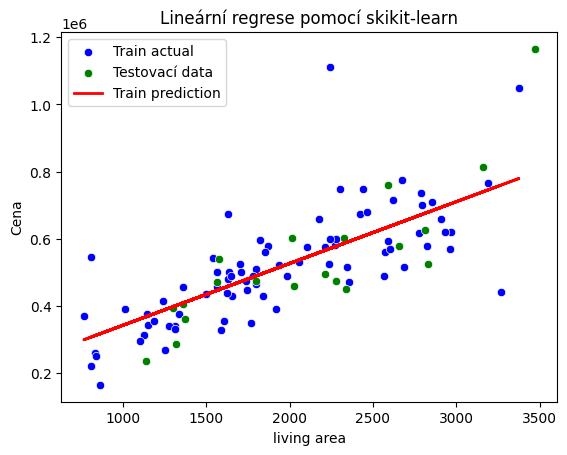

In [97]:
X = data[['livingArea']]
Y = data["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

print("w0 (intercpect): ", model.intercept_)
print("w1 (koef): ", model.coef_[0])

mse_train = mean_squared_error(Y_train, Y_pred_train)
mse_test = mean_squared_error(Y_test, Y_pred_test)
r2_train = r2_score(Y_train, Y_pred_train)
r2_test = r2_score(Y_test, Y_pred_test)

print("RMSE trenovaci data: ", mse_train)
print("RMSE testovaci data: ", mse_test)
print("R2 trenovaci data: ", r2_train)
print("R2 testovaci data: ", r2_test)

plt.figure()
sns.scatterplot(x=X_train.values.flatten(), y=Y_train, label="Train actual", color="blue")
sns.scatterplot(x=X_test.values.flatten(), y=Y_test, label="Testovací data", color="green")
plt.plot(X_train, Y_pred_train, color="red", linewidth=2, label="Train prediction")
plt.xlabel("living area")
plt.ylabel("Cena")
plt.legend()
plt.title("Lineární regrese pomocí skikit-learn")
plt.show()